# CS6375 - Machine Learning

## Assignment 2

## Team:
Siddhant Suresh Medar - SSM200002 and Adithya Iyer - ASI200000

## Dataset used:
Iris Dataset (LINK: https://archive.ics.uci.edu/ml/datasets/iris)

## Data Set Information:
Source/ Creator:

R.A. Fisher

Donor:

Michael Marshall (MARSHALL%PLU '@' io.arc.nasa.gov)

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


## Attribute Information:

FEATURES
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

5. class: (TARGET VARIABLE)
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica


## Relevant Papers:

Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950).
[Web Link]

Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis. (Q327.D83) John Wiley & Sons. ISBN 0-471-22361-1. See page 218.
[Web Link]

Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System Structure and Classification Rule for Recognition in Partially Exposed Environments". IEEE Transactions on Pattern Analysis and Machine Intelligence, Vol. PAMI-2, No. 1, 67-71.
[Web Link]

Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule". IEEE Transactions on Information Theory, May 1972, 431-433.
[Web Link]

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import TensorBoard
plt.style.use('ggplot')

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf

## Class to define to create, train and evaluate Neural Network

Streaming output truncated to the last 5000 lines.
4/4 - 0s - loss: 0.2083 - accuracy: 0.6667 - val_loss: 0.2082 - val_accuracy: 0.6667 - 68ms/epoch - 17ms/step
Epoch 127/200
4/4 - 0s - loss: 0.2082 - accuracy: 0.6667 - val_loss: 0.2081 - val_accuracy: 0.6667 - 46ms/epoch - 11ms/step
Epoch 128/200
4/4 - 0s - loss: 0.2082 - accuracy: 0.6750 - val_loss: 0.2081 - val_accuracy: 0.6667 - 49ms/epoch - 12ms/step
Epoch 129/200
4/4 - 0s - loss: 0.2081 - accuracy: 0.6750 - val_loss: 0.2080 - val_accuracy: 0.6667 - 41ms/epoch - 10ms/step
Epoch 130/200
4/4 - 0s - loss: 0.2080 - accuracy: 0.6917 - val_loss: 0.2079 - val_accuracy: 0.6667 - 43ms/epoch - 11ms/step
Epoch 131/200
4/4 - 0s - loss: 0.2079 - accuracy: 0.6667 - val_loss: 0.2078 - val_accuracy: 0.6667 - 45ms/epoch - 11ms/step
Epoch 132/200
4/4 - 0s - loss: 0.2079 - accuracy: 0.6750 - val_loss: 0.2078 - val_accuracy: 0.6667 - 47ms/epoch - 12ms/step
Epoch 133/200
4/4 - 0s - loss: 0.2078 - accuracy: 0.6667 - val_loss: 0.2077 - val_accuracy: 0.6

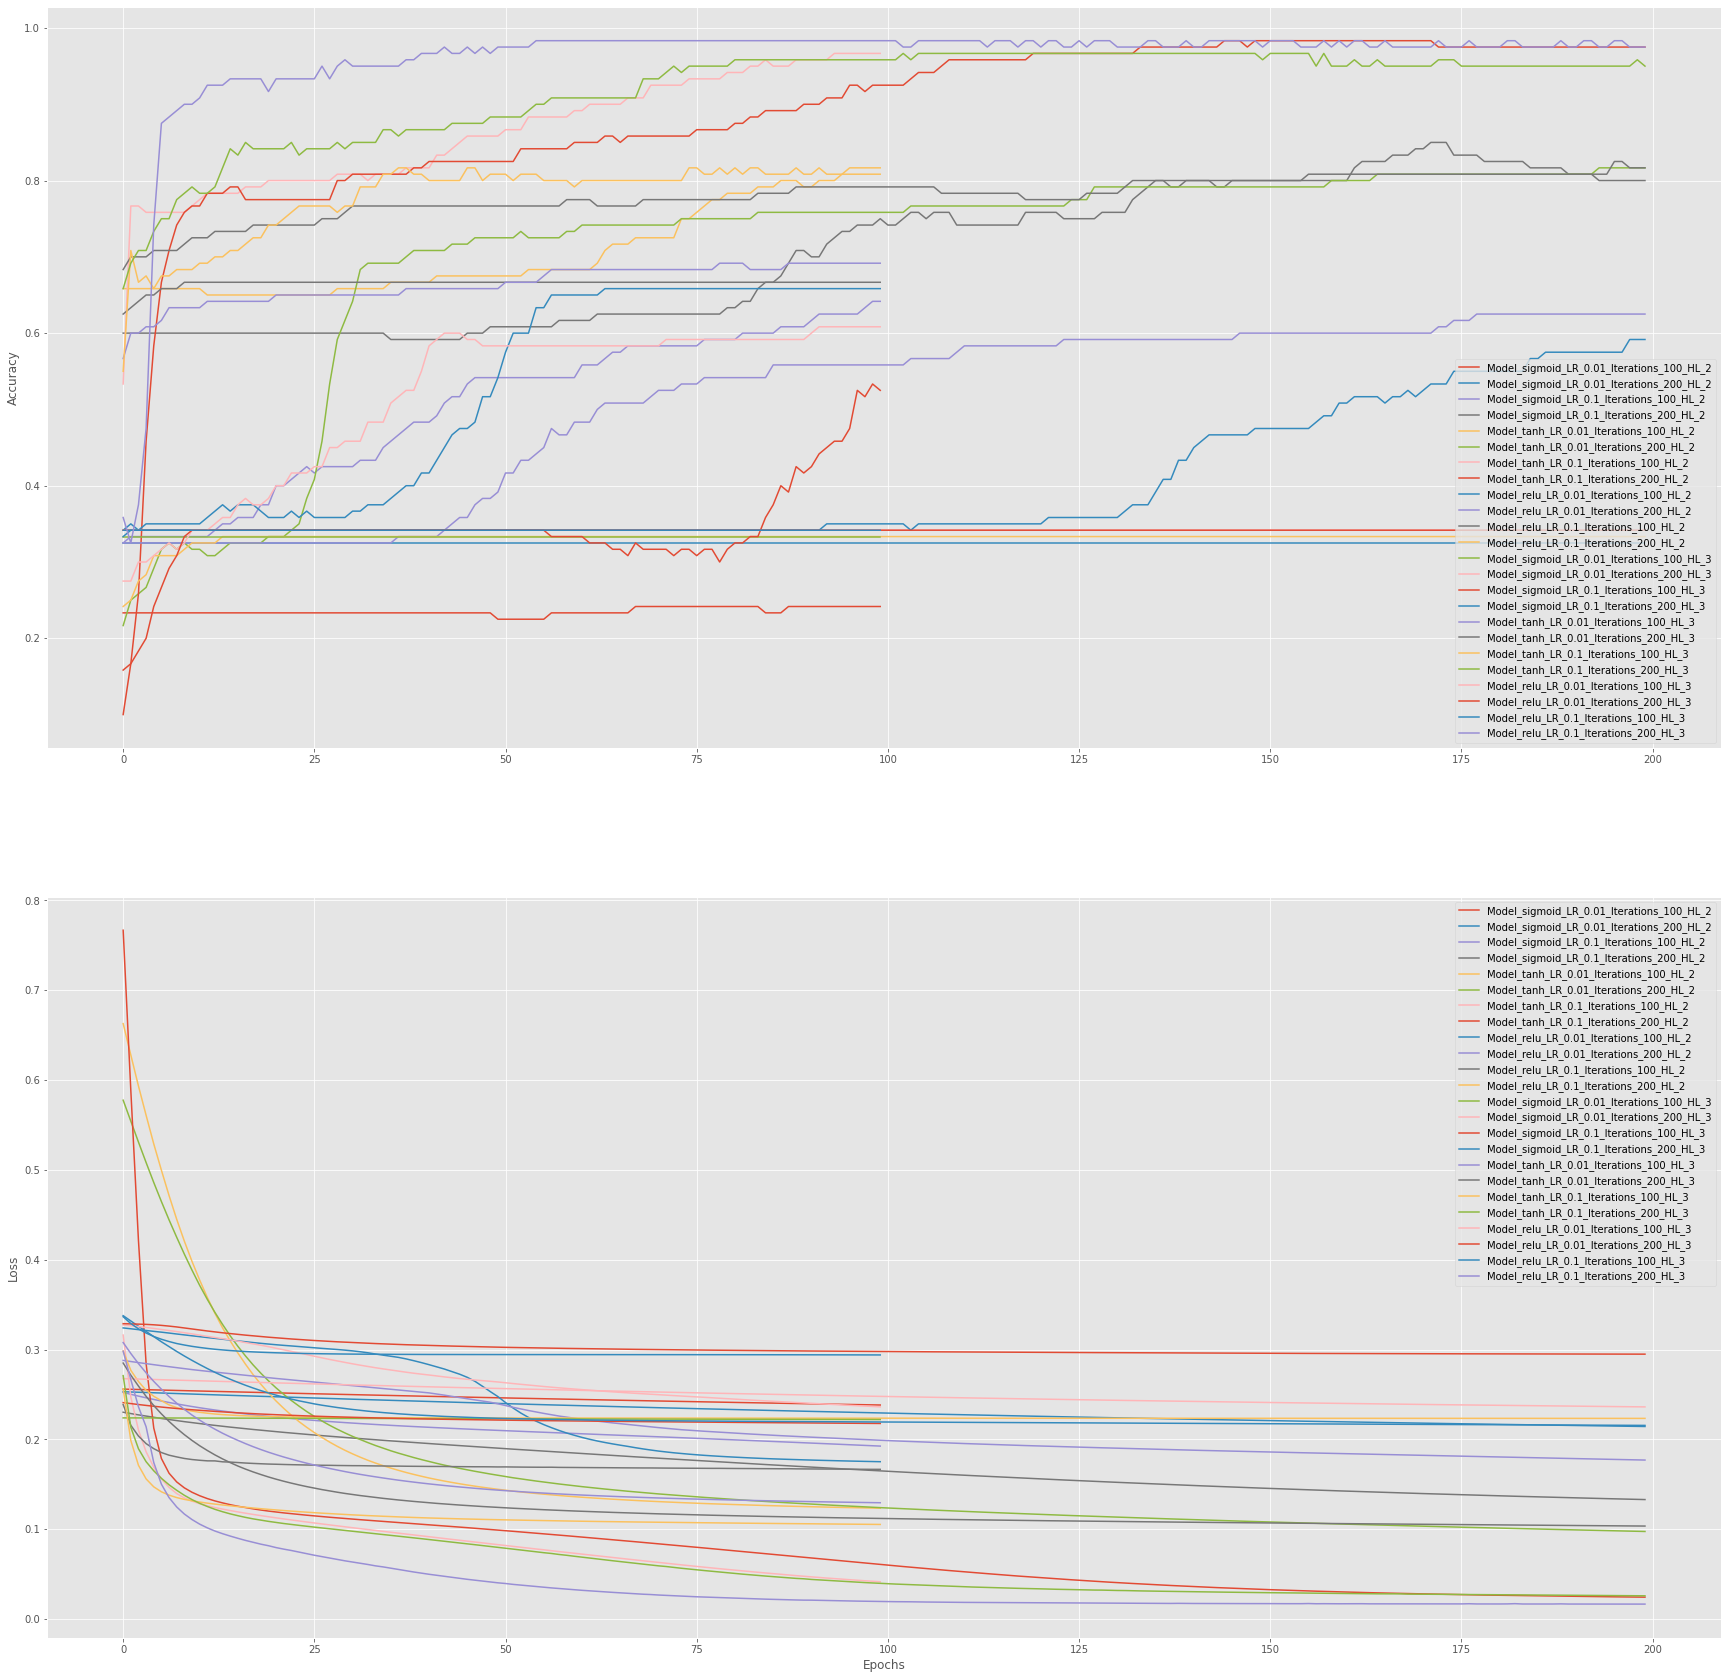

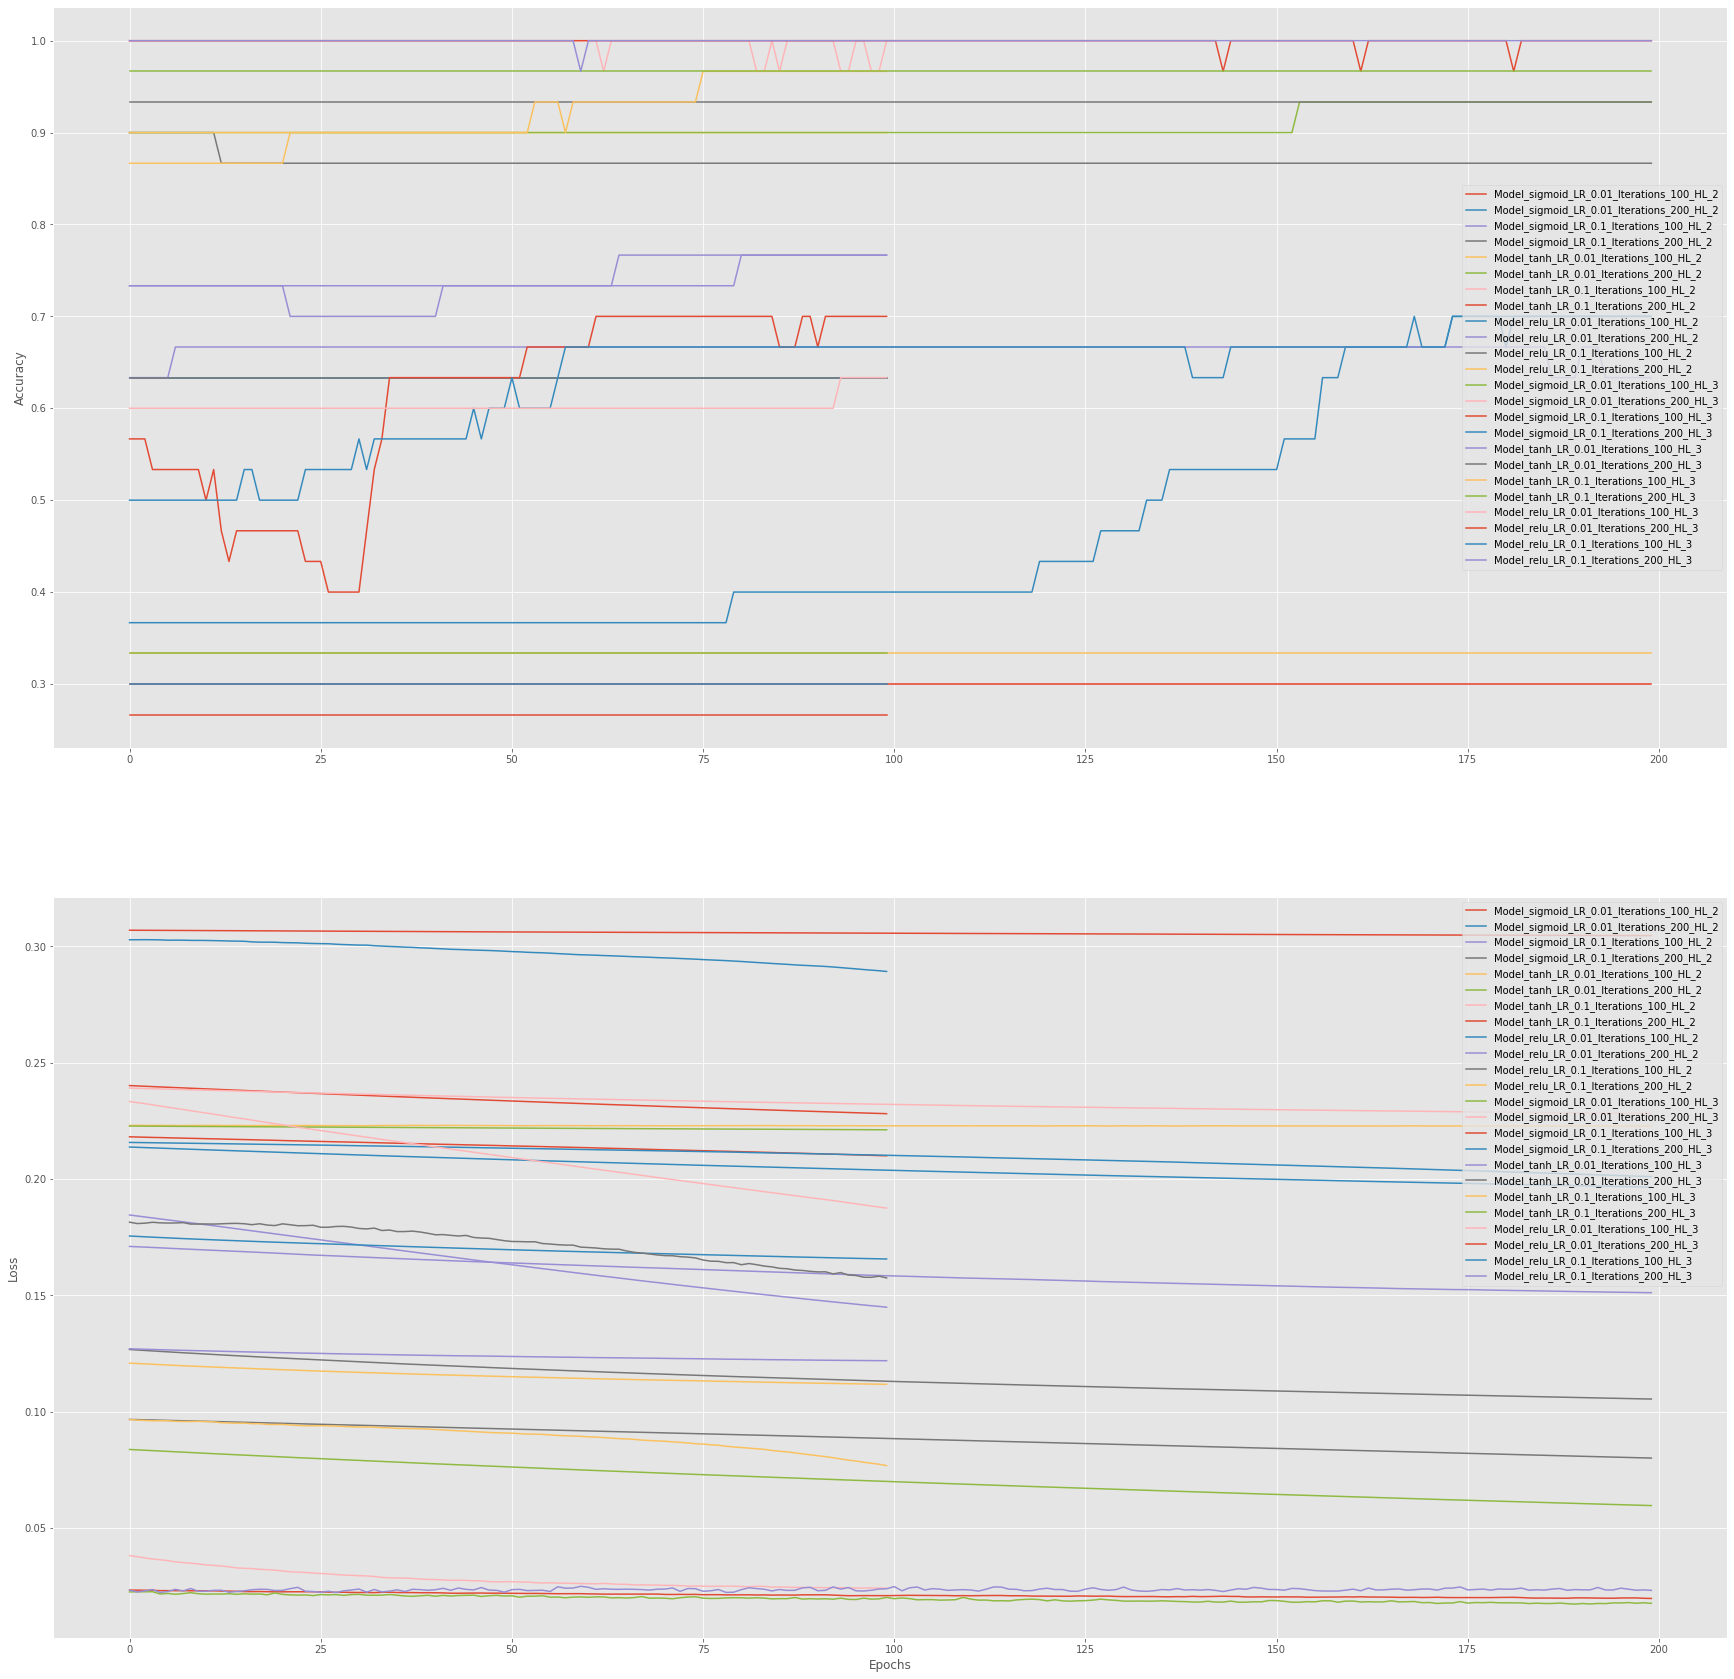

In [2]:
class NeuralNet:
    def __init__(self):
        #define column names
        columns = ['SEPAL_LENGTH','SEPAL_WIDTH','PETAL_LENGTH','PETAL_WIDTH','SPECIES']
        #load the dataset
        self.df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names = columns)

    def preprocess(self):
         #drop missing values
        self.df.dropna( inplace = True )

        #drop duplicates from the dataset
        self.df.drop_duplicates()

        #seperate X and y from dataframe
        X = self.df.iloc[:,:-1]
        y = self.df.iloc[:,-1]

        #encode categorical values
        enc = OneHotEncoder()
        y = enc.fit_transform(y[:, np.newaxis]).toarray()
        
        #standardize the data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        #split the data set into train and test set
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42)
        
        #length of input features and output classes 
        self.n_features = X.shape[1]
        self.n_classes = y.shape[1]

    def train_evaluate(self):
        #define the lists for possible activation functions, learning rate and iterations to be tried out
        activations = ['sigmoid', 'tanh', 'relu'] #NOTE: In keras, Logistic activation is actually Sigmoid activation
        learning_rate = [0.01, 0.1]
        iterations = [100, 200]

        #define dictionaries to store the history_callback metrics for the models which we will be creating
        hist_train = {}
        hist_test = {}
        
        #define tensorboard object which is required for callback
        cb = TensorBoard()
        
        #MODEL WITH TWO HIDDEN LAYER        
        
        #iterate through all the possible activation functions, learning rate and iterations
        for act in activations:
            for lr in learning_rate:
                for itr in iterations:
                    name = "Model_"+str(act)+"_LR_"+str(lr)+"_Iterations_"+str(itr)+"_HL_2"
                    print(name)
                    
                    #create model
                    model = Sequential(name=name) #define sequential model
                    model.add(Dense(3, input_dim=self.n_features, activation= act)) #first layer/ input layer
                    model.add(Dense(self.n_classes, activation=act)) #second layer/output layer

                    opt = tf.keras.optimizers.SGD(learning_rate=lr) #use SGD as the optimizer (NOTE: Use tf.keras.optimizers if running in google colab)
                    model.compile(loss='mean_squared_error', 
                                  optimizer=opt, 
                                  metrics=['accuracy']) #use MSE as the loss function and tweak the model on the basis of accuracy
                    
                    #fit the model
                    history_callback = model.fit(self.X_train, self.y_train,
                                                     epochs=itr,
                                                     verbose=2,
                                                     validation_data=(self.X_train, self.y_train),
                                                     callbacks=[cb])
                    
                    #calculate model error on training data to compute train error
                    score = model.evaluate(self.X_train, self.y_train, verbose=0)
                    print("Activation: "+str(act)+" LR: "+str(lr)+" Itertions: "+str(itr)+" || Train loss:", score[0])
                    print("Activation: "+str(act)+" LR: "+str(lr)+" Itertions: "+str(itr)+" || Train Accuracy:", score[1])
                    
                    #store the model metrics in the hashmap/dictionary hist_train
                    hist_train[model.name] = [history_callback, model]


                    history_callback = model.fit(self.X_train, self.y_train,
                                                     epochs=itr,
                                                     verbose=2,
                                                     validation_data=(self.X_test, self.y_test),
                                                     callbacks=[cb])
                    
                    #calculate model error on testing data to compute test error
                    score = model.evaluate(self.X_test, self.y_test, verbose=0)
                    print("Activation: "+str(act)+" LR: "+str(lr)+" Iterations: "+str(itr)+" || Test loss:", score[0])
                    print("Activation: "+str(act)+" LR: "+str(lr)+" Iterations: "+str(itr)+" || Test Accuracy:", score[1])
                    
                    #store the model metrics in the hashmap/dictionary hist_test
                    hist_test[model.name] = [history_callback, model]

                    print("=============================================================================")


        #MODEL WITH THREE HIDDEN LAYERS
        
        for act in activations:
            for lr in learning_rate:
                for itr in iterations:
                    name = "Model_"+str(act)+"_LR_"+str(lr)+"_Iterations_"+str(itr)+"_HL_3"
                    print(name)
                    model = Sequential(name=name)
                    model.add(Dense(3, input_dim=self.n_features, activation= act)) #first layer/input layer
                    model.add(Dense(4, activation=act)) #second layer
                    model.add(Dense(self.n_classes, activation=act)) #third layer

                    opt = tf.keras.optimizers.SGD(learning_rate=lr) #use SGD as the optimizer
                    model.compile(loss='mean_squared_error', 
                                  optimizer=opt, 
                                  metrics=['accuracy']) #tweak model on the basis of accuracy
                    
                    history_callback = model.fit(self.X_train, self.y_train,
                                                     epochs=itr,
                                                     verbose=2,
                                                     validation_data=(self.X_train, self.y_train),
                                                     callbacks=[cb])
                    
                    #calculate model error on training data to compute train error
                    score = model.evaluate(self.X_train, self.y_train, verbose=0)
                    print("Activation: "+str(act)+" LR: "+str(lr)+" Itertions: "+str(itr)+" || Train loss:", score[0])
                    print("Activation: "+str(act)+" LR: "+str(lr)+" Itertions: "+str(itr)+" || Train Accuracy:", score[1])
                    
                    #store the model metrics in the hashmap/dictionary hist_train
                    hist_train[model.name] = [history_callback, model]
                    

                    history_callback = model.fit(self.X_train, self.y_train,
                                                     epochs=itr,
                                                     verbose=2,
                                                     validation_data=(self.X_test, self.y_test),
                                                     callbacks=[cb])
                    
                    #calculate model error on testing data to compute test error
                    score = model.evaluate(self.X_test, self.y_test, verbose=0)
                    print("Activation: "+str(act)+" LR: "+str(lr)+" Iterations: "+str(itr)+" || Test loss:", score[0])
                    print("Activation: "+str(act)+" LR: "+str(lr)+" Iterations: "+str(itr)+" || Test Accuracy:", score[1])
                    
                    #store the model metrics in the hashmap/dictionary hist_test
                    hist_test[model.name] = [history_callback, model]
                    
                    print("=============================================================================")
        
        #plot the metrics stored in the hashmap hist_train and hist_test
        fig, (ax1, ax2) = plt.subplots(2, figsize=(30, 30))
        
        for model_name in hist_train:
            val_accuracy = hist_train[model_name][0].history['val_accuracy']
            val_loss = hist_train[model_name][0].history['val_loss']
            ax1.plot(val_accuracy, label=model_name)
            ax2.plot(val_loss, label=model_name)

        ax1.set_ylabel('Accuracy')
        ax2.set_ylabel('Loss')
        ax2.set_xlabel('Epochs')
        ax1.legend()
        ax2.legend()

        fig, (ax1, ax2) = plt.subplots(2, figsize=(30, 30))

        for model_name in hist_test:
            val_accuracy = hist_test[model_name][0].history['val_accuracy']
            val_loss = hist_test[model_name][0].history['val_loss']
            ax1.plot(val_accuracy, label=model_name)
            ax2.plot(val_loss, label=model_name)

        ax1.set_ylabel('Accuracy')
        ax2.set_ylabel('Loss')
        ax2.set_xlabel('Epochs')
        ax1.legend()
        ax2.legend()

#create an object of class NeuralNet
nn = NeuralNet()

#call preprocess function
nn.preprocess()

#call train_evaluate function
nn.train_evaluate()
